In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [2]:
ufo = pd.read_csv('/Users/gregorygreen/scrubbed.csv')

In [3]:
ufo.columns.values

array(['datetime', 'city', 'state', 'country', 'shape',
       'duration (seconds)', 'duration (hours/min)', 'comments',
       'date posted', 'latitude', 'longitude '], dtype=object)

In [4]:
ufo['longitude'] = ufo['longitude '].astype(float)

In [5]:
# Add a `sighting` column to make some other calculations easy
ufo['sighting'] = 1

In [6]:
ufo.drop(['longitude ', 'duration (hours/min)'], axis=1, inplace=True)

In [7]:
ufo = ufo.reindex(columns=['datetime','city', 'state', 'country', 'shape','duration (seconds)','comments','date posted', 'longitude', 'latitude', 'sighting'])

In [8]:
ufo.columns.values

array(['datetime', 'city', 'state', 'country', 'shape',
       'duration (seconds)', 'comments', 'date posted', 'longitude',
       'latitude', 'sighting'], dtype=object)

In [9]:
ufo.head()

,datetime,city,state,country,shape,duration (seconds),comments,date posted,longitude,latitude,sighting
0,10/10/1949,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,4/27/04,-97.941111,29.883056,1
1,10/10/1949,lackland afb,tx,NaN,light,7200.0,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/05,-98.581082,29.384210,1
2,10/10/1955,chester (uk/england),NaN,gb,circle,20.0,Green/Orange circular disc over Chester&#44 En...,1/21/08,-2.916667,53.200000,1
3,10/10/1956,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,1/17/04,-96.645833,28.978333,1
4,10/10/1960,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/04,-157.803611,21.418056,1


In [10]:
ufo.isnull().sum()

datetime               101
city                   101
state                 5876
country               9750
shape                 2030
duration (seconds)     101
comments               116
date posted            101
longitude              101
latitude               101
sighting                 0
dtype: int64

In [11]:
ufo.dropna(how = 'any', axis=0, subset = ['country', 'latitude', 'longitude', 'shape', 'city', 'comments', 'date posted', 'state',],inplace=True)

In [12]:
ufo.isnull().sum()

datetime              0
city                  0
state                 0
country               0
shape                 0
duration (seconds)    0
comments              0
date posted           0
longitude             0
latitude              0
sighting              0
dtype: int64

In [13]:
ufo.head()

,datetime,city,state,country,shape,duration (seconds),comments,date posted,longitude,latitude,sighting
0,10/10/1949,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,4/27/04,-97.941111,29.883056,1
3,10/10/1956,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,1/17/04,-96.645833,28.978333,1
4,10/10/1960,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/04,-157.803611,21.418056,1
5,10/10/1961,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,4/27/07,-82.188889,36.595000,1
7,10/10/1965,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,10/2/99,-73.408333,41.117500,1


In [14]:
ufo['datetime'] = pd.to_datetime(ufo['datetime'])

In [15]:
ufo.head()

,datetime,city,state,country,shape,duration (seconds),comments,date posted,longitude,latitude,sighting
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,4/27/04,-97.941111,29.883056,1
3,1956-10-10,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,1/17/04,-96.645833,28.978333,1
4,1960-10-10,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/04,-157.803611,21.418056,1
5,1961-10-10,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,4/27/07,-82.188889,36.595000,1
7,1965-10-10,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,10/2/99,-73.408333,41.117500,1


In [16]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66447 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            66447 non-null  datetime64[ns]
 1   city                66447 non-null  object        
 2   state               66447 non-null  object        
 3   country             66447 non-null  object        
 4   shape               66447 non-null  object        
 5   duration (seconds)  66447 non-null  float64       
 6   comments            66447 non-null  object        
 7   date posted         66447 non-null  object        
 8   longitude           66447 non-null  float64       
 9   latitude            66447 non-null  float64       
 10  sighting            66447 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 6.1+ MB


In [17]:
# convert column to float
ufo['latitude'] = ufo['latitude'].astype(float)
ufo['duration (seconds)'] = ufo['duration (seconds)'].astype(float)

In [18]:
ufo['datetime'] = pd.to_datetime(ufo['datetime'])

In [19]:
# Create a new column, year, using just the year from the datetime
ufo['year'] = ufo['datetime'].dt.year

# Create new column, month, using just the month from the datetime
ufo['month'] = ufo['datetime'].dt.month

In [20]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66447 entries, 0 to 80331
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            66447 non-null  datetime64[ns]
 1   city                66447 non-null  object        
 2   state               66447 non-null  object        
 3   country             66447 non-null  object        
 4   shape               66447 non-null  object        
 5   duration (seconds)  66447 non-null  float64       
 6   comments            66447 non-null  object        
 7   date posted         66447 non-null  object        
 8   longitude           66447 non-null  float64       
 9   latitude            66447 non-null  float64       
 10  sighting            66447 non-null  int64         
 11  year                66447 non-null  int64         
 12  month               66447 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), ob

In [21]:
ufo.head()

,datetime,city,state,country,shape,duration (seconds),comments,date posted,longitude,latitude,sighting,year,month
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,4/27/04,-97.941111,29.883056,1,1949,10
3,1956-10-10,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,1/17/04,-96.645833,28.978333,1,1956,10
4,1960-10-10,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/04,-157.803611,21.418056,1,1960,10
5,1961-10-10,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,4/27/07,-82.188889,36.595000,1,1961,10
7,1965-10-10,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,10/2/99,-73.408333,41.117500,1,1965,10


In [22]:
# checking for typos
typos = []

row = -1 
for el in ufo['latitude']:
    row += 1
    if type(el) == float:
        continue
    for char in el:
        if char.isnumeric() or char == ".":
            continue
        else:
            typos.append((row, el))
            break
typos

[]

In [23]:
ufo[['duration (seconds)', 'year', 'month']].describe()

,duration (seconds),year,month
count,6.644700e+04,66447.000000,66447.000000
mean,6.578909e+03,2004.195163,6.869219
std,5.111561e+05,10.309720,3.227485
min,1.000000e-02,1931.000000,1.000000
25%,3.000000e+01,2001.000000,4.000000
50%,1.800000e+02,2007.000000,7.000000
75%,6.000000e+02,2011.000000,9.000000
max,8.280000e+07,2029.000000,12.000000


In [24]:
# How Many Unique States, Countries, and Shape Are Included In The Data

print('Number of States:', len(ufo['state'].unique()))
print('Number of Countries:', len(ufo['country'].unique()))
print('Number of Shapes:', len(ufo['shape'].unique()))

Number of States: 67
Number of Countries: 4
Number of Shapes: 28


In [25]:
ufo.value_counts('country')

country
us    63489
ca     2937
gb       11
au       10
dtype: int64

In [26]:
# Top 10 US States Report The Most Sightings
ufo[ufo['country'] == 'us'].value_counts('state', ascending=False).nlargest(10)

state
ca    8674
fl    3751
wa    3703
tx    3392
ny    2912
il    2445
az    2361
pa    2318
oh    2249
mi    1780
dtype: int64

In [27]:
ufo[(ufo['country'] == 'us') & (ufo['year'] == 2000)].value_counts('state', ascending=False).nlargest(10)

state
ca    376
az    172
wa    167
tx    115
fl     96
ny     90
or     84
il     72
oh     69
pa     59
dtype: int64

In [28]:
# Top 5 Most Common Shapes
ufo.value_counts('shape', ascending=False).nlargest(5)

shape
light       14123
triangle     6811
circle       6400
fireball     5358
unknown      4771
dtype: int64

In [29]:
ufo[ufo['country'] != 'us'].value_counts('shape', ascending=False).nlargest(5)

shape
light       659
circle      287
triangle    269
other       239
fireball    216
dtype: int64

In [30]:
# Creating Dataframe For The Top 5 Shapes

top_5_shapes = ['light', 'circle', 'triangle', 'other', 'sphere']

top_5_ufo = ufo[ufo['shape'].isin(top_5_shapes)]

top_5_ufo.head()

,datetime,city,state,country,shape,duration (seconds),comments,date posted,longitude,latitude,sighting,year,month
3,1956-10-10,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,1/17/04,-96.645833,28.978333,1,1956,10
4,1960-10-10,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/04,-157.803611,21.418056,1,1960,10
5,1961-10-10,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,4/27/07,-82.188889,36.595000,1,1961,10
10,1968-10-10,hawthorne,ca,us,circle,300.0,ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY W...,10/31/03,-118.351667,33.916389,1,1968,10
15,1972-10-10,harlan county,ky,us,circle,1200.0,On october 10&#44 1972 myself&#44my 5yrs.daugh...,9/15/05,-83.321944,36.843056,1,1972,10


In [31]:
# aggregations

avg_sighting = round(ufo['duration (seconds)'].mean(), 2)
median_sighting = round(ufo['duration (seconds)'].median(), 2)

# print out the times
print('The average sighting lasts for {0} seconds, or {1} minutes.'.format(avg_sighting, round(avg_sighting/60),2))
print('The median sighting duration is {0} seconds, or {1} minutes.'.format(median_sighting, round(median_sighting/60),2))

The average sighting lasts for 6578.91 seconds, or 110 minutes.
The median sighting duration is 180.0 seconds, or 3 minutes.


Text(0.5, 0.98, 'Average Sighting Duration By Year')

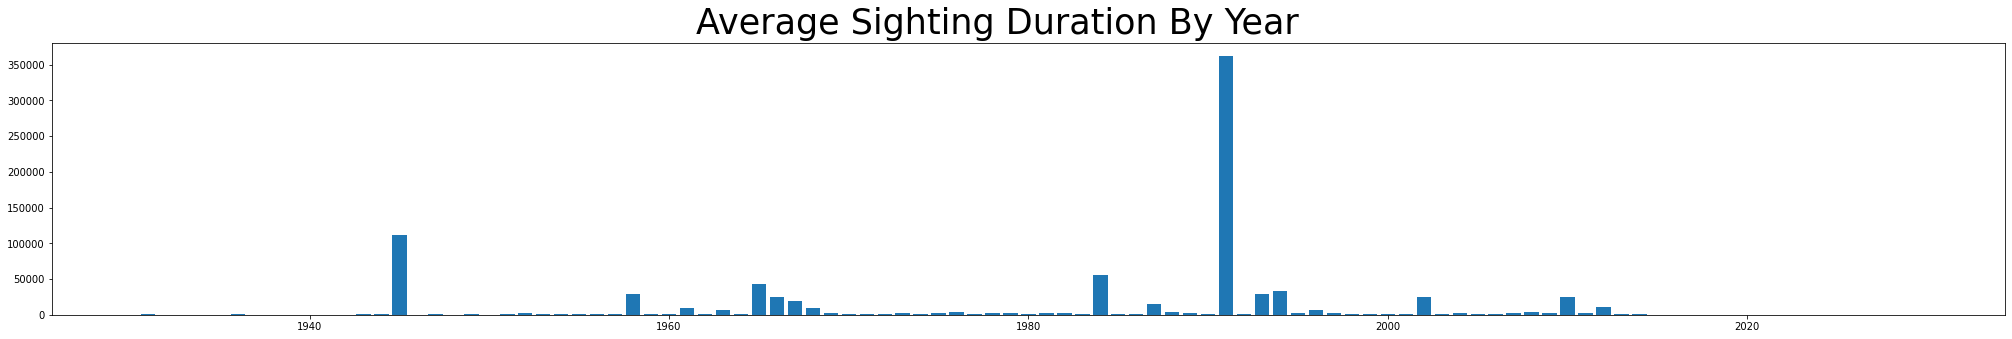

In [32]:
plt.figure(figsize=(35,5))

mean_ufo = ufo.groupby('year').agg('mean').reset_index()

plt.bar(mean_ufo['year'], mean_ufo['duration (seconds)'])
plt.suptitle('Average Sighting Duration By Year', fontsize=35)

Text(0, 0.5, 'Sightings')

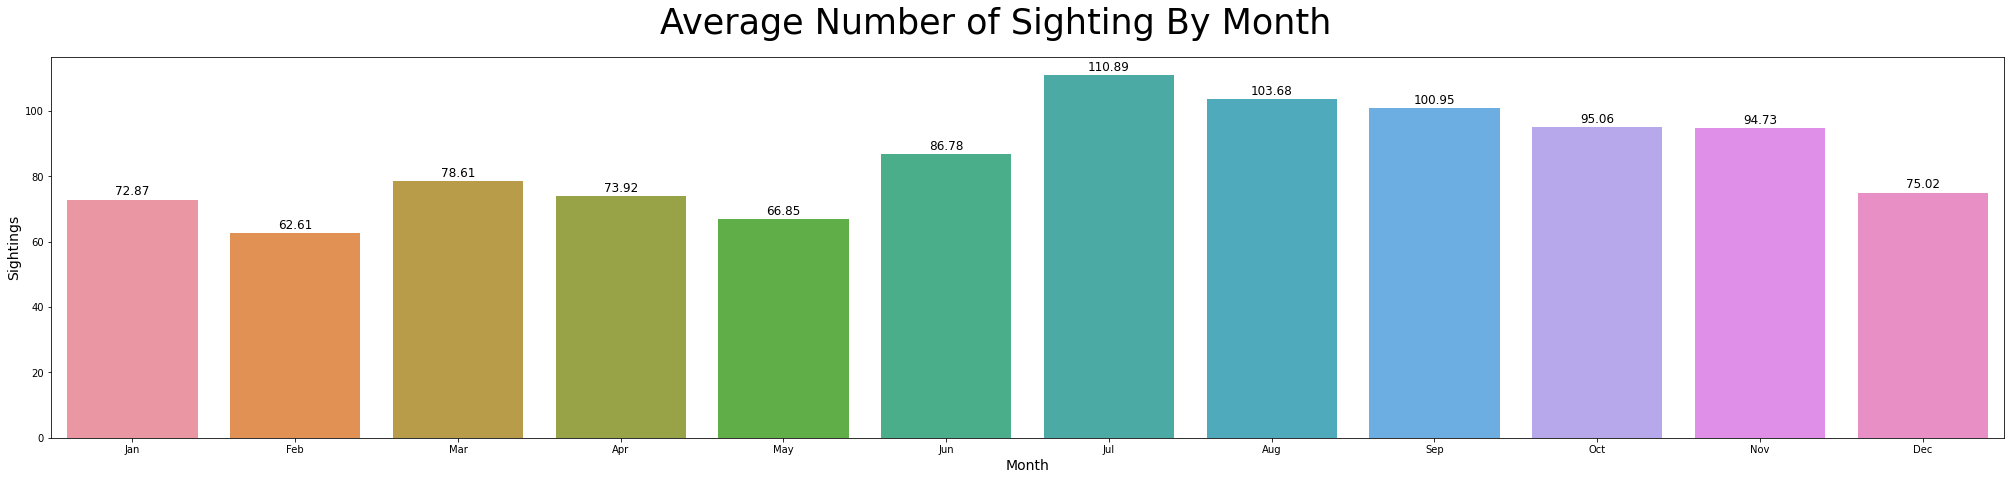

In [33]:
#set figure size 
plt.figure(figsize=(35,7))

# group data by year and month, to determine the number of sightings in each month
year_month_ufo = ufo.groupby(['year','month']).agg('sum').reset_index()

# group data by month to figure out the average number of sightings in each month 
month_ufo = year_month_ufo.groupby('month').agg('mean').reset_index()

# Replace the month number with month name
month_ufo['month'] = month_ufo['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

# Create plot
plots = sns.barplot(data = month_ufo, x = month_ufo['month'], y=month_ufo['sighting'])

# Iterrating over the bars one-by-one to annoate each bar with the number of average sightings
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
# Modify titles and labels
plt.suptitle('Average Number of Sighting By Month', fontsize=35)
plt.xlabel("Month", size=14)
plt.ylabel("Sightings", size=14)

Text(0.5, 0.98, 'UFO Sightings Over Type by Country')

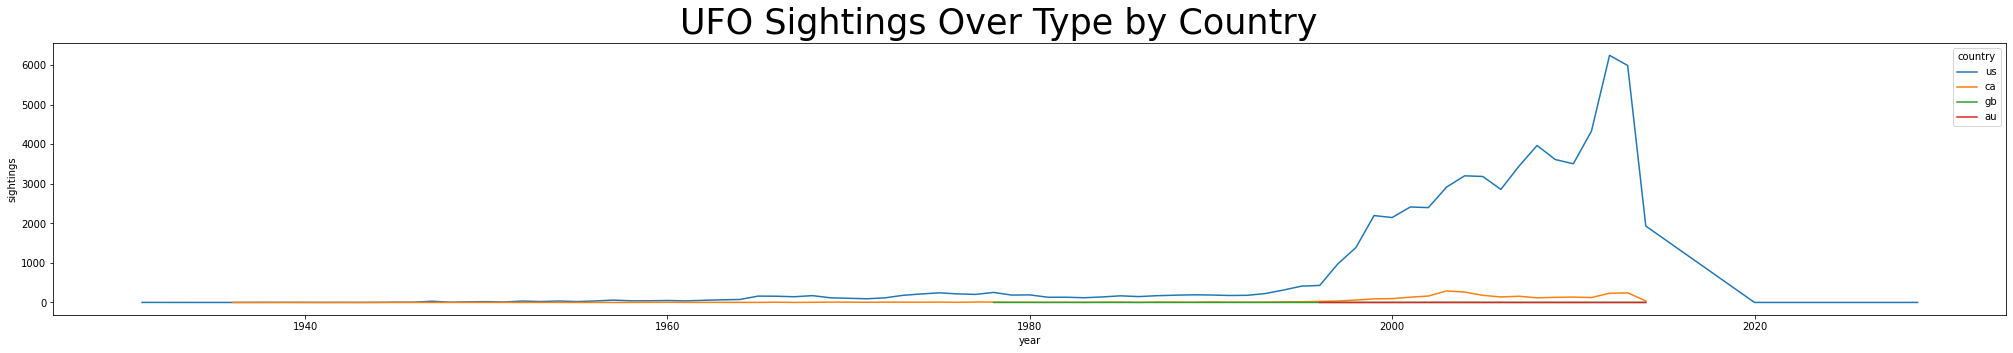

In [34]:
# Count of sightings by year and country 
time_series = ufo[['year', 'country']].value_counts().reset_index()

# name columns
time_series.columns = ['year', 'country', 'sightings']

# figure size
plt.figure(figsize=(35,5))

#plot
sns.lineplot(data = time_series, x= 'year', y='sightings', hue='country')
plt.suptitle("UFO Sightings Over Type by Country", fontsize=35)

Text(0.5, 0.98, 'UFO Sightings Over Type by Top 5 Shapes')

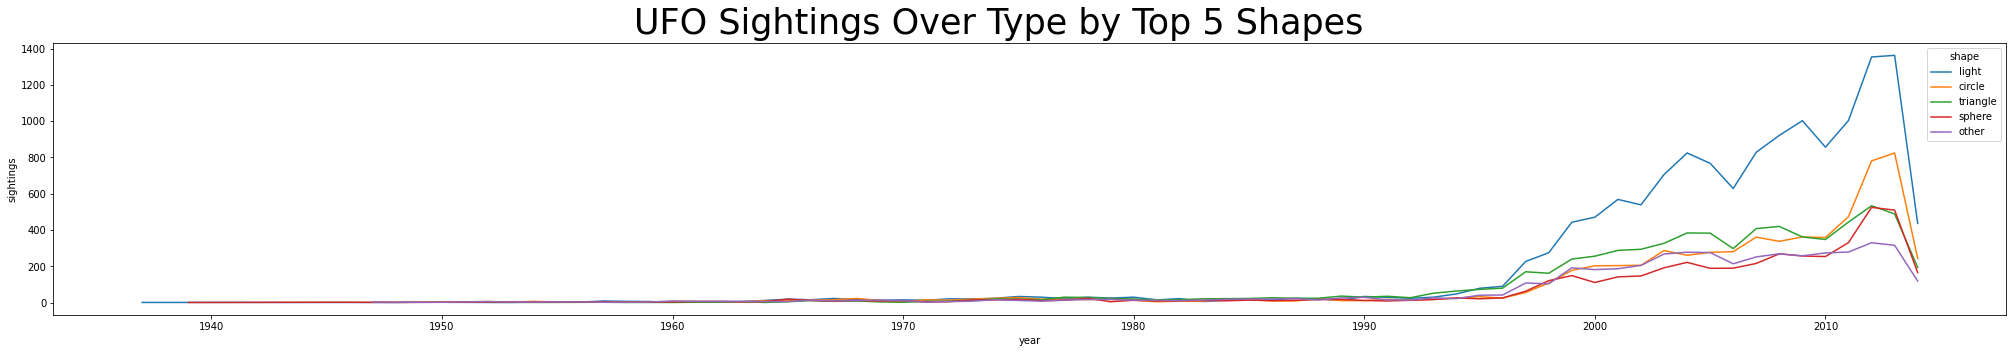

In [35]:
# get a count of sightings by year and country and save this as a dataframe
shape_time_series = top_5_ufo[['year', 'shape']].value_counts().reset_index()

# Name the columns
shape_time_series.columns = ['year', 'shape', 'sightings']

#set figure size 
plt.figure(figsize=(35,5))

# create plot
sns.lineplot(data = shape_time_series, x= 'year', y='sightings', hue='shape')
plt.suptitle("UFO Sightings Over Type by Top 5 Shapes", fontsize=35)

In [36]:
ufo.to_csv(r'/Users/gregorygreen/scrubbed2.csv')